In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

et.data.get_data(url="https://figshare.com/ndownloader/files/31746578");


/home/myge/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Extracted output to /home/myge/earth-analytics/data/earthpy-downloads/pruebas_curso


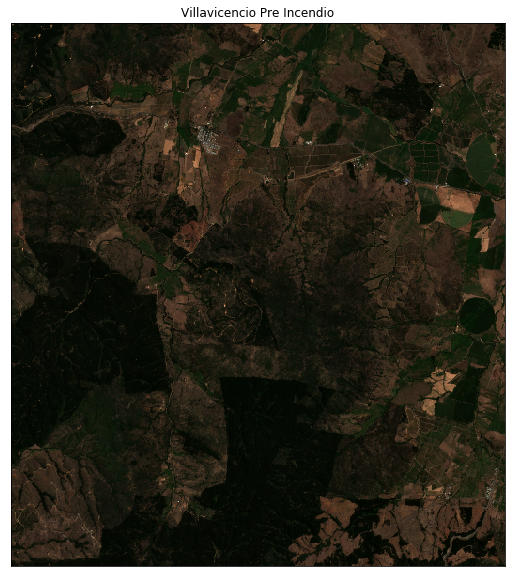

In [99]:
with rio.open('R096_T18HYF_20170119T144547_resampled_20m_reprojected.tif') as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()

fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_rgb(
    naip_pre_fire,
    rgb=(2,1,0),
    ax=ax,
    title="Villavicencio Pre Incendio",
)
plt.show()

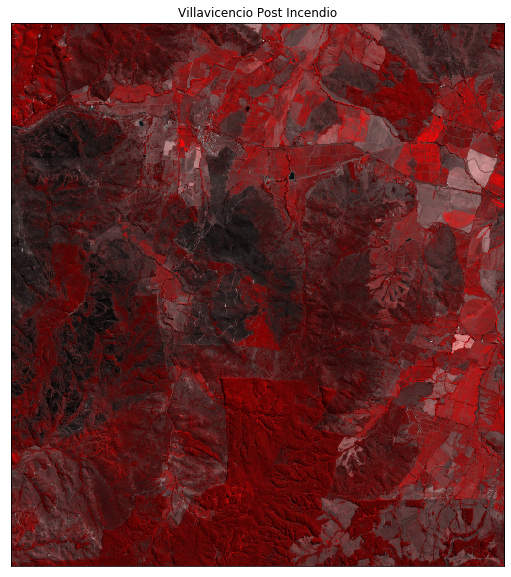

In [98]:

with rio.open('R096_T18HYF_20170320T145159_resampled_20m_reprojected.tif') as naip_postfire_src:
    naip_postfire_src = naip_postfire_src.read()


fig, ax = plt.subplots(figsize=(10, 10))

ep.plot_rgb(
    naip_postfire_src,
    rgb=(6,2,2),
    ax=ax,
    title="Villavicencio Post Incendio",
)
plt.show()

In [102]:
et.data.get_data(url="http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip");
et.data.get_data(url="https://ndownloader.figshare.com/files/26266609");
et.data.get_data(url="https://ndownloader.figshare.com/files/26295142");

Extracted output to /home/myge/earth-analytics/data/earthpy-downloads/ne_50m_coastline
Extracted output to /home/myge/earth-analytics/data/earthpy-downloads/ne_50m_populated_places_simple
Extracted output to /home/myge/earth-analytics/data/earthpy-downloads/ne_50m_admin_0_countries


featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          3   Zimbabwe    ZWE         0      2   
1  Admin-0 country          1          3     Zambia    ZMB         0      2   
2  Admin-0 country          1          3      Yemen    YEM         0      2   
3  Admin-0 country          3          2    Vietnam    VNM         0      2   
4  Admin-0 country          5          3  Venezuela    VEN         0      2   

                TYPE      ADMIN ADM0_A3  ...  NAME_KO    NAME_NL    NAME_PL  \
0  Sovereign country   Zimbabwe     ZWE  ...     짐바브웨   Zimbabwe   Zimbabwe   
1  Sovereign country     Zambia     ZMB  ...      잠비아     Zambia     Zambia   
2  Sovereign country      Yemen     YEM  ...       예멘      Jemen      Jemen   
3  Sovereign country    Vietnam     VNM  ...      베트남    Vietnam    Wietnam   
4  Sovereign country  Venezuela     VEN  ...    베네수엘라  Venezuela  Wenezuela   

     NAME_PT    NAME_RU    NAME_SV    NAME_TR    NAME_VI NAME_ZH  \
0   Zimbábue   Зимбабве   Zimbabwe   Zimbabve   Zimbabwe     辛巴威   
1     Zâmbia     Замбия     Zambia    Zambiya     Zambia     赞比亚   
2      Iémen      Йемен      Jemen      Yemen      Yemen      也门   
3   Vietname    Вьетнам    Vietnam    Vietnam   Việt Nam      越南   
4  Venezuela  Венесуэла  Venezuela  Venezuela  Venezuela    委內瑞拉   

                                            geometry  
0  POLYGON ((31.28789 -22.40205, 31.19727 -22.344...  
1  POLYGON ((30.39609 -15.64307, 30.25068 -15.643...  
2  MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...  
3  MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...  
4  MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...  

[5 rows x 95 columns]

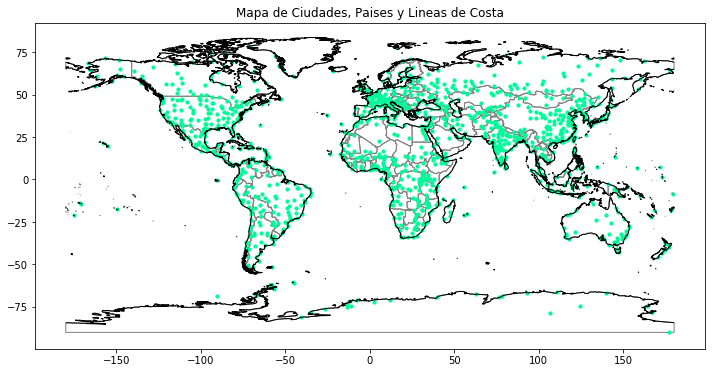

In [129]:
boundary = gpd.read_file('ne_50m_coastline/ne_50m_coastline.shp')
countries = gpd.read_file('/home/myge/Documents/GitHub/tareas/xxx/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
cities = gpd.read_file('ne_50m_populated_places_simple/ne_50m_populated_places_simple.shp')

f, ax1 = plt.subplots(figsize=(12, 6));

boundary.plot(ax=ax1, color='black',linewidth=1);
countries.plot(ax=ax1,             
            edgecolor='gray',
            facecolor='none'
            );
cities.plot(ax=ax1,
            markersize=10,
            color='mediumspringgreen'
            )
plt.title('Mapa de Ciudades, Paises y Lineas de Costa')
plt.show()

In [132]:
et.data.get_data(url="https://github.com/balonchino/imagenes/raw/main/asignacion3_prueba3_IBOS249.zip")

Extracted output to /home/myge/earth-analytics/data/earthpy-downloads/asignacion3_prueba3_IBOS249


In [3]:
ne_roads = gpd.read_file('asignacion3_prueba3_IBOS249/ne_10m_roads.shp')
places = gpd.read_file('asignacion3_prueba3_IBOS249/ne_110m_populated_places_simple.shp')
country_boundary_us = gpd.read_file('asignacion3_prueba3_IBOS249/usa-boundary-dissolved.shp')

In [20]:

if (ne_roads.crs == country_boundary_us.crs):
    print("Ambos layers tienen el mismo CRS!", ne_roads.crs, country_boundary_us.crs,places.crs)

ne_roads_clip = gpd.clip(ne_roads, country_boundary_us)
places_clip = gpd.clip(places,country_boundary_us)



Ambos layers tienen el mismo CRS! epsg:4326 epsg:4326 epsg:4326


     scalerank  natscale  labelrank       featurecla     name namepar namealt  \
179          1       300          1  Admin-1 capital  Atlanta    None    None   

     diffascii nameascii  adm0cap  ...  pop_other rank_max  rank_min  \
179          0   Atlanta      0.0  ...    2874096       12        10   

     geonameid meganame  ls_name ls_match checkme min_zoom  \
179  4180439.0  Atlanta  Atlanta        1       0      3.0   

                       geometry  
179  POINT (-84.40190 33.83196)  

[1 rows x 38 columns]
     scalerank  natscale  labelrank       featurecla     name namepar namealt  \
180          1       300          1  Populated place  Chicago    None    None   

     diffascii nameascii  adm0cap  ...  pop_other rank_max  rank_min  \
180          0   Chicago      0.0  ...    3635101       13        12   

     geonameid meganame  ls_name ls_match checkme min_zoom  \
180  4887398.0  Chicago  Chicago        1       0      3.0   

                       geometry  
180  POIN

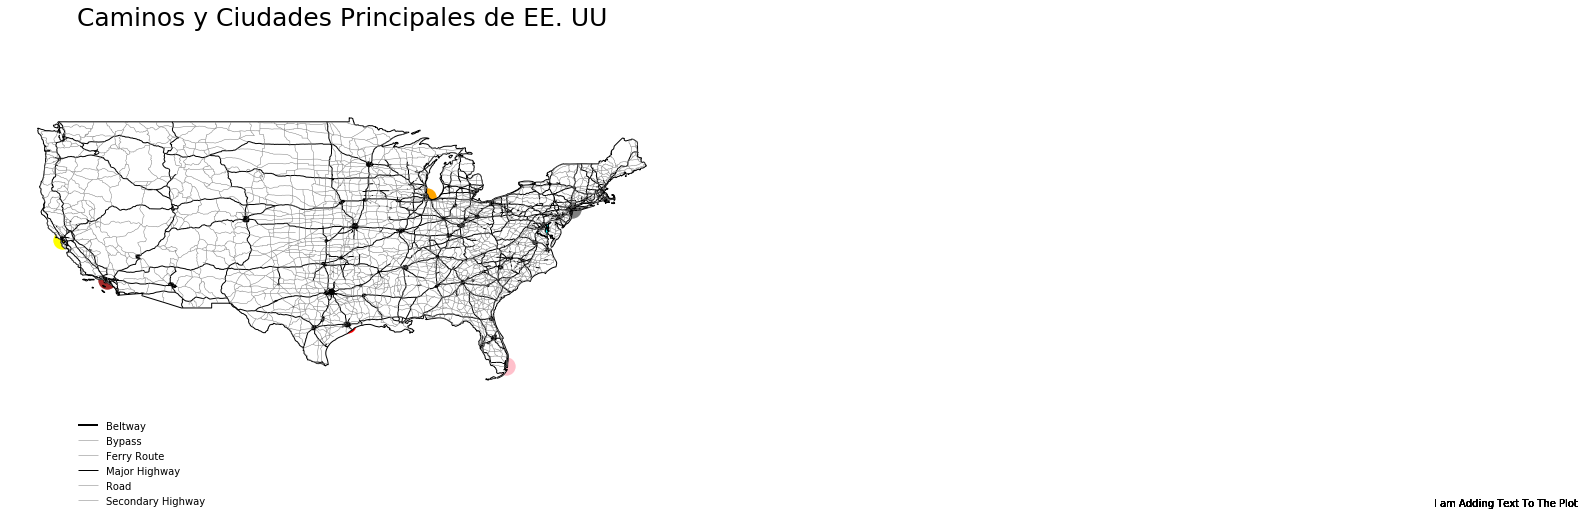

In [72]:
# Plotear los datos con leyenda personalizada

# Primero, crear un diccionario con los atributos para cada categoría
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}


cities_attrs = {
                'San Francisco' : ['yellow'],
                'Los Angeles' : ['brown'],
                'Denver' : ['green'],
                'Houston' : ['Red'],
                'Atlanta' : ['blue'],
                'Miami' : ['pink'],
                'Chicago' : ['orange'],
                'Washington, D.C.' : ['aqua'],
                'New York' : ['gray']
}

print(places_clip.groupby('name'))

# Plotear los datos
fig, ax = plt.subplots(figsize=(12, 8))

# Loop que recorre diccionario y se plotea los datos usando el diccionario 
for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])


for ctype, data in places_clip.groupby('name'):
    data.plot(color=cities_attrs[ctype][0],
                markersize=300,
                legend='asd',
                ax=ax)
    print(data['geometry'])
    plt.text(7.8, 12.5, "I am Adding Text To The Plot")

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)


# Dibuja leyenda sin marco y posición
ax.legend(frameon=False, loc = (0.1, -0.1))

ax.set_title("Caminos y Ciudades Principales de EE. UU", fontsize=25)
ax.set_axis_off()

plt.axis('equal');
plt.show()